In [1]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from scipy import optimize
from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt 
from matplotlib import rcParams 

import pandas as pd
import multiprocessing as mp
import astropy.coordinates as coord
import numpy.ma as ma
plt.rc('font',size=20)

In [6]:
m=pd.read_csv('m_both_stars_i<24.2_ira_c_dist.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
m

,Unnamed: 0,# object_id,ra_1,dec_1,r_extendedness_value,i_sdsscentroid_ra,i_sdsscentroid_dec,i_sdsscentroid_rasigma,i_sdsscentroid_decsigma,g_cmodel_mag,...,extinction_i,extinction_z,Separation,ug,gr,gi,FeH,Dkpc,pmra,pmdec
0,0,40576381406418125,0.835297,-1.245051,0.0,0.835297,-1.245051,0.002034,0.001893,24.368395,...,0.069569,0.049326,0.062084,1.464455,1.423637,2.965200,-0.600000,1.256123,3.478499,-5.142952
1,2,40576381406418365,0.683341,-1.237796,0.0,0.683341,-1.237796,0.015752,0.013195,25.020439,...,0.074696,0.052961,0.224048,4.324634,0.848095,1.313648,-0.600000,27.566939,-16.365221,15.306191
2,3,40576381406418453,0.814517,-1.235199,0.0,0.814517,-1.235199,0.001334,0.001276,23.684545,...,0.069383,0.049193,0.055770,4.390499,1.312601,2.877218,-0.600000,1.174048,-5.575081,0.189087
3,4,40576381406418565,0.803881,-1.232000,0.0,0.803881,-1.232000,0.002454,0.002338,23.660356,...,0.069653,0.049385,0.358707,5.832941,1.408926,2.022062,-0.600000,5.138735,-14.362873,-32.871166
4,5,40576381406418674,0.813074,-1.228503,0.0,0.813074,-1.228503,0.000317,0.000297,21.871723,...,0.068795,0.048776,0.596017,2.607182,1.354641,3.276592,-0.600000,0.227764,59.055931,-8.146643
5,6,40576381406418874,0.703096,-1.222601,0.0,0.703096,-1.222601,0.000650,0.000600,20.627430,...,0.072889,0.051679,0.106109,1.409583,0.578234,0.882835,-0.847583,5.654204,2.388230,-10.338779
6,7,40576381406419118,0.770468,-1.215038,0.0,0.770468,-1.215038,0.001257,0.001125,23.908936,...,0.069778,0.049473,0.044486,5.348711,1.281000,3.221384,-0.600000,0.671330,4.445575,-0.189759
7,8,40576381406419335,0.706252,-1.208794,0.0,0.706252,-1.208794,0.001742,0.001576,22.375448,...,0.071650,0.050801,0.023627,1.798436,0.792273,1.150356,-0.600000,9.669001,-0.355503,-2.335862
8,9,40576381406419397,0.786027,-1.207838,0.0,0.786027,-1.207838,0.000244,0.000232,20.489990,...,0.068658,0.048679,0.103680,2.658999,1.218792,2.091059,-0.600000,1.165745,3.171861,-9.871131
9,10,40576381406433790,0.815021,-1.255737,0.0,0.815021,-1.255737,0.001432,0.001334,21.577881,...,0.071182,0.050469,0.105979,1.135614,0.434515,0.618784,-0.813762,14.094679,-5.217046,-9.225561


In [12]:
m['pm']=m.Separation*100

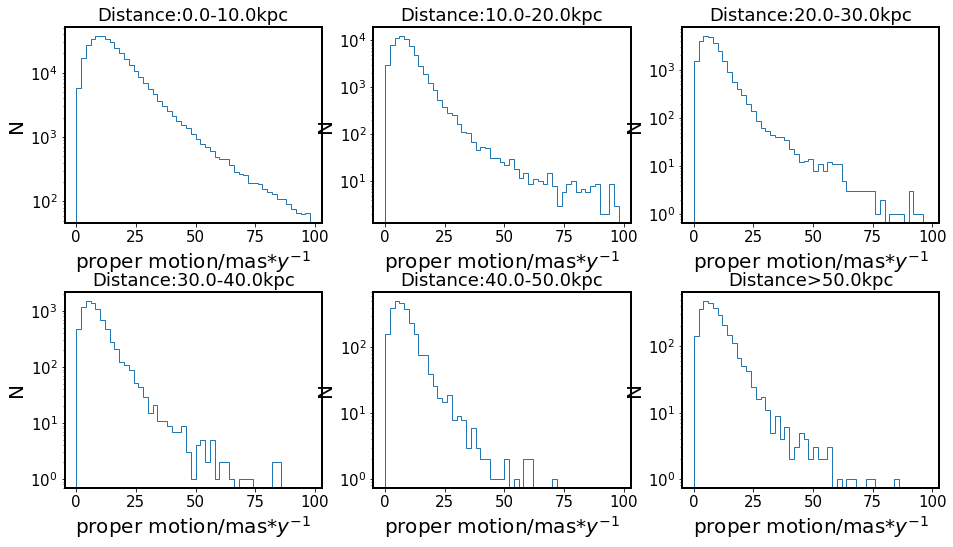

In [39]:
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

# define plotting space 
fig = plt.figure(figsize=(15,8)) 
fig.subplots_adjust(hspace=0.35, top=0.9, bottom=0.1, left=0.12, right=0.93)

Dmin = np.zeros(6) 
Dmin[0] = 0
Dmin[1] = 10
Dmin[2] = 20
Dmin[3] = 30
Dmin[4] = 40
Dmin[5] = 50
for i in range(5):
    ax = plt.subplot(2,3,i+1) 
    ax.set_xlabel('proper motion/mas*$y^{-1}$')
    ax.set_ylabel('N')
    title = 'Distance:'+str(Dmin[i])+'-'+str(Dmin[i]+10)+'kpc'
    ax.set_title(title)
    ax.set_yscale('log')
    
    t=m[(m.Dkpc>Dmin[i])&(m.Dkpc<Dmin[i]+10)]
    bins=np.arange(0,100,2)
    plt.hist(t.pm,bins=bins,histtype='step')

ax = plt.subplot(2,3,6) 
ax.set_xlabel('proper motion/mas*$y^{-1}$')
ax.set_ylabel('N')
title = 'Distance>'+str(Dmin[5])+'kpc'
ax.set_title(title)
ax.set_yscale('log')
    
t=m[(m.Dkpc>Dmin[5])]
bins=np.arange(0,100,2)
plt.hist(t.pm,bins=bins,histtype='step')
plt.savefig('pm_dist_Dbins.png')

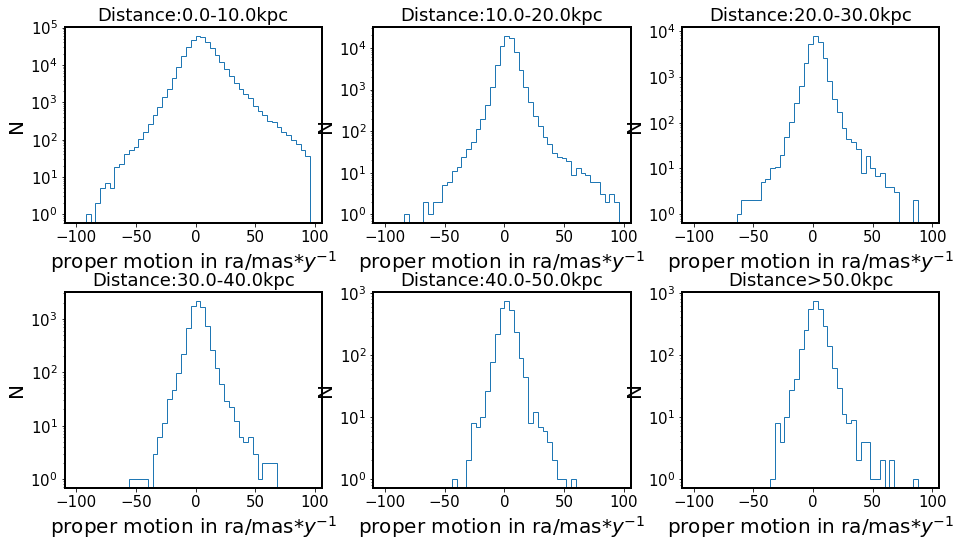

In [40]:
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

# define plotting space 
fig = plt.figure(figsize=(15,8)) 
fig.subplots_adjust(hspace=0.35, top=0.9, bottom=0.1, left=0.12, right=0.93)
# location of the colorbar in Figure units 
bottom, height =  1.14, 0.02 

Dmin = np.zeros(6) 
Dmin[0] = 0
Dmin[1] = 10
Dmin[2] = 20
Dmin[3] = 30
Dmin[4] = 40
Dmin[5] = 50
for i in range(5):
    ax = plt.subplot(2,3,i+1) 
    ax.set_xlabel('proper motion in ra/mas*$y^{-1}$')
    ax.set_ylabel('N')
    title = 'Distance:'+str(Dmin[i])+'-'+str(Dmin[i]+10)+'kpc'
    ax.set_title(title)
    ax.set_yscale('log')
    
    t=m[(m.Dkpc>Dmin[i])&(m.Dkpc<Dmin[i]+10)]
    bins=np.arange(-100,100,4)
    plt.hist(t.pmra,bins=bins,histtype='step')

ax = plt.subplot(2,3,6) 
ax.set_xlabel('proper motion in ra/mas*$y^{-1}$')
ax.set_ylabel('N')
title = 'Distance>'+str(Dmin[5])+'kpc'
ax.set_title(title)
ax.set_yscale('log')
    
t=m[(m.Dkpc>Dmin[5])]
plt.hist(t.pmra,bins=bins,histtype='step')
plt.savefig('pmra_dist_Dbins.png')

In [ ]:
#check the catalog from Zeljko, DR7

In [2]:
s=pd.read_csv('../Downloads/catalog/Zeljko_DR7.csv')

In [5]:
pd.set_option('max_columns',100)

In [6]:
s

,X,Y,Z,vX,vY,vZ,Zph,Mr,D,fDerr,ra,dec,run,Ar,u,g,r,i,z,uErr,gErr,rErr,iErr,zErr,errX,errY,errZ,ZphErr,fDerr2,pmL,pmB
0,8203.1,-2054.2,-3717.2,233.4,110.7,-48.4,-1.71,5.21,4251.9,7.2,0.00019,-0.83871,3325,0.12,19.53,18.70,18.35,18.24,18.16,0.05,0.03,0.02,0.01,0.03,65.5,63.8,63.3,0.19,4.8,12.07,-4.95
1,7709.1,-3643.1,-9465.1,-151.6,511.5,-192.2,-0.96,4.96,10146.2,9.8,0.00167,-9.84770,1729,0.10,21.39,20.37,19.99,19.87,19.85,0.18,0.03,0.03,0.03,0.14,225.5,230.5,225.8,0.62,28.2,-3.99,-11.10
2,8172.2,-1770.1,-3216.1,2.6,241.6,-132.8,-1.08,4.01,3675.1,8.2,0.00226,-0.95004,2662,0.12,18.07,17.09,16.83,16.75,16.72,0.03,0.02,0.02,0.02,0.01,48.9,52.8,50.1,0.17,6.1,1.49,-15.76
3,9447.3,-5407.7,-5763.0,-318.6,302.2,-363.6,-1.60,4.62,8034.3,7.8,0.00268,15.24044,1739,0.12,20.30,19.42,19.14,19.05,19.04,0.06,0.02,0.02,0.02,0.06,139.6,139.4,140.2,0.29,8.2,-6.03,-13.70
4,7911.8,-1245.7,-3187.1,137.2,271.6,-110.0,-1.66,3.90,3423.0,11.6,0.00297,-9.50696,1729,0.09,17.66,16.79,16.57,16.51,16.53,0.02,0.03,0.02,0.02,0.03,47.9,55.0,46.9,0.20,5.2,7.25,-18.58
5,8259.7,-2166.7,-3721.7,221.8,248.1,-129.0,-1.38,5.31,4314.2,6.8,0.00345,0.62543,3325,0.08,19.75,18.84,18.48,18.33,18.24,0.05,0.02,0.03,0.02,0.03,67.1,67.5,65.9,0.21,6.5,12.21,-12.47
6,10187.1,-8071.7,-8484.5,309.8,259.4,-166.9,-0.71,4.57,11913.1,10.1,0.00345,15.67614,1739,0.15,21.39,20.30,19.95,19.83,19.93,0.12,0.03,0.03,0.03,0.10,262.6,262.0,261.3,0.40,18.8,6.50,-4.21
7,9919.1,-7239.6,-7797.8,492.9,486.4,-330.3,-1.64,4.72,10812.0,11.6,0.00408,14.90372,1739,0.11,21.05,20.18,19.89,19.79,19.75,0.09,0.03,0.02,0.03,0.09,237.9,237.7,234.1,0.45,13.4,11.73,-9.30
8,8078.9,-793.4,-1434.4,-10.3,9.5,-5.8,-0.68,4.78,1641.1,6.1,0.00413,-0.80932,3325,0.12,17.34,16.23,15.86,15.72,15.68,0.02,0.03,0.01,0.01,0.02,21.4,21.4,21.3,0.10,4.0,-1.19,-1.54
9,7672.0,-3982.8,-10393.9,292.1,461.5,-186.1,-0.95,4.51,11135.7,9.5,0.00431,-9.94401,1729,0.09,21.03,20.02,19.74,19.59,19.58,0.13,0.02,0.02,0.03,0.11,227.3,229.8,226.3,0.59,26.8,4.80,-9.82
